
# Домашнее задание №1

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import cross_validation, datasets, metrics, neighbors 
import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
%matplotlib inline

## Задача 1

In [148]:
#генерируем данные
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [149]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
accuracy=[] # массив точностей при разном количестве соседей

In [150]:
#разбиваем данные на обучающие и тестовые
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [151]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [152]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels,
                                                                             estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, 
                                                                            estimator.predict(test_data))))

In [153]:
# визуализируем разделяющие поверхности  и считаем точность при каждом k в 5-fold cross-validation
def task_1(k,accuracy):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)

    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
    scores = cross_validation.cross_val_score(estimator.fit(train_data,train_labels),
                                              test_data, test_labels, cv=5)
    accuracy.append(scores.mean())
    

### К=1

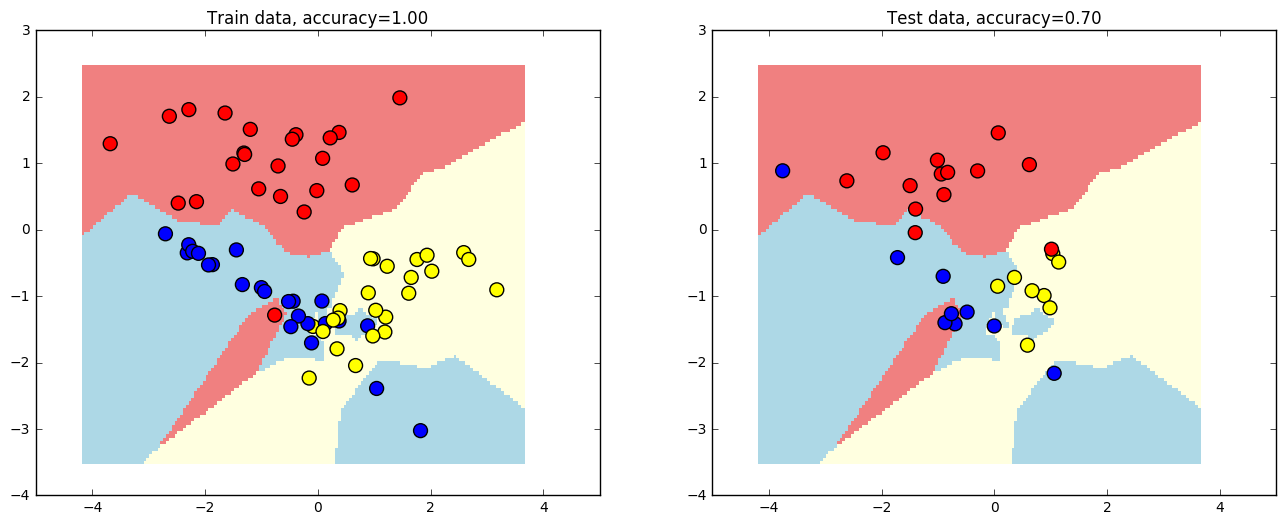

In [154]:
task_1(1,accuracy)

### K=2

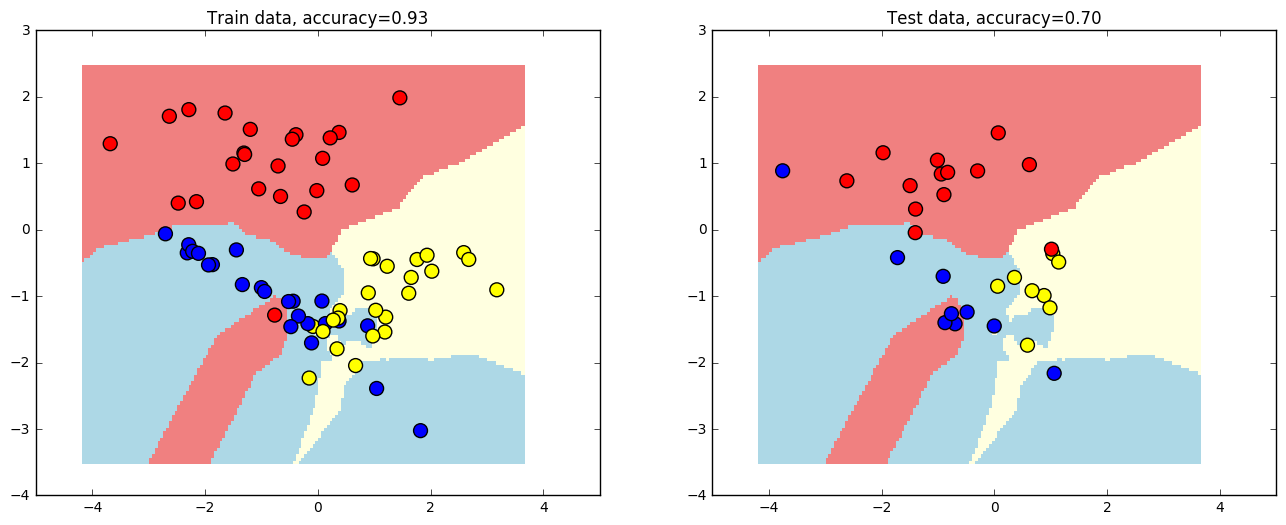

In [155]:
task_1(2,accuracy)

### K=3

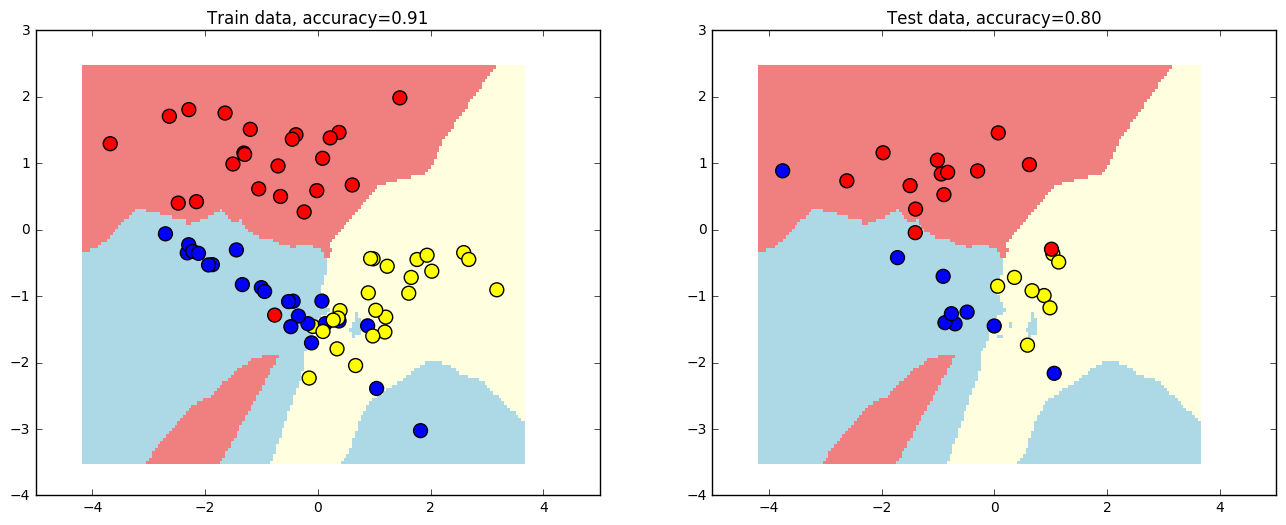

In [156]:
task_1(3,accuracy)

### K=5

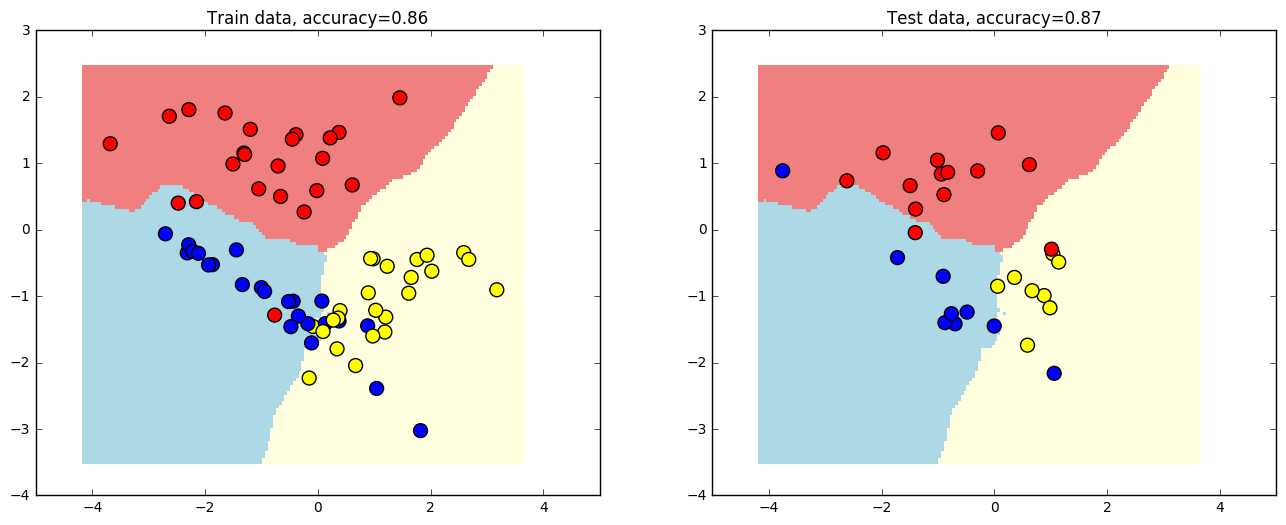

In [157]:
task_1(5,accuracy)

### K=10

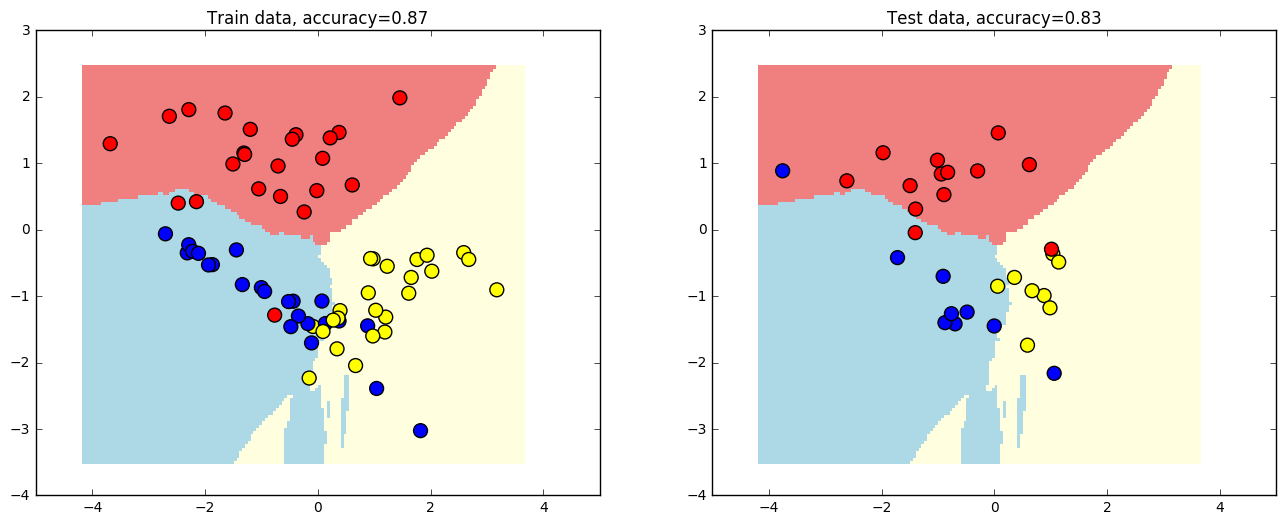

In [158]:
task_1(10,accuracy)

### K=15

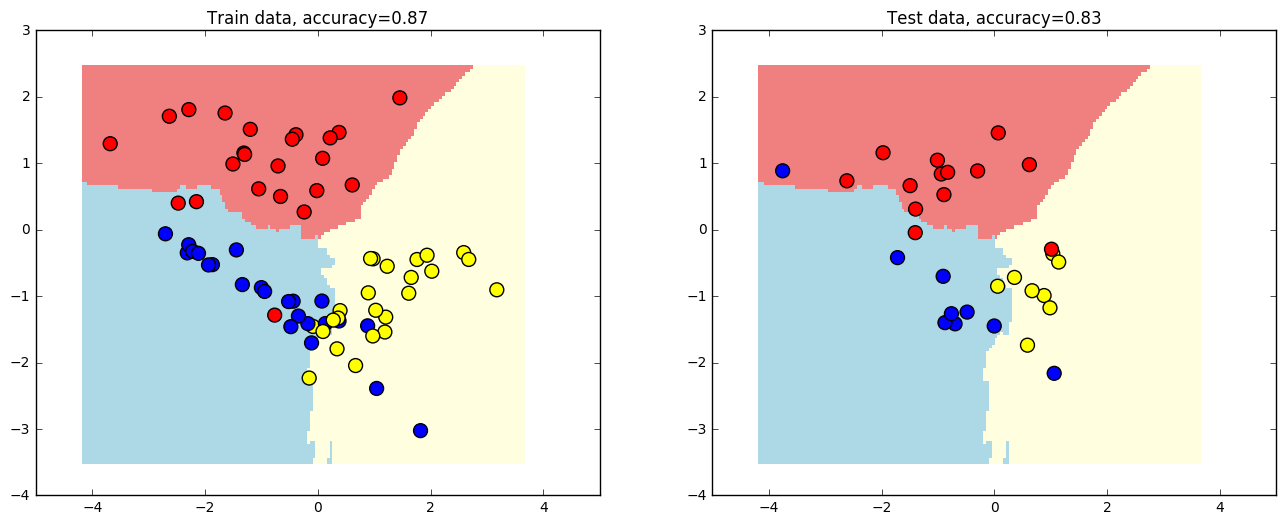

In [159]:
task_1(15,accuracy)

### K=20

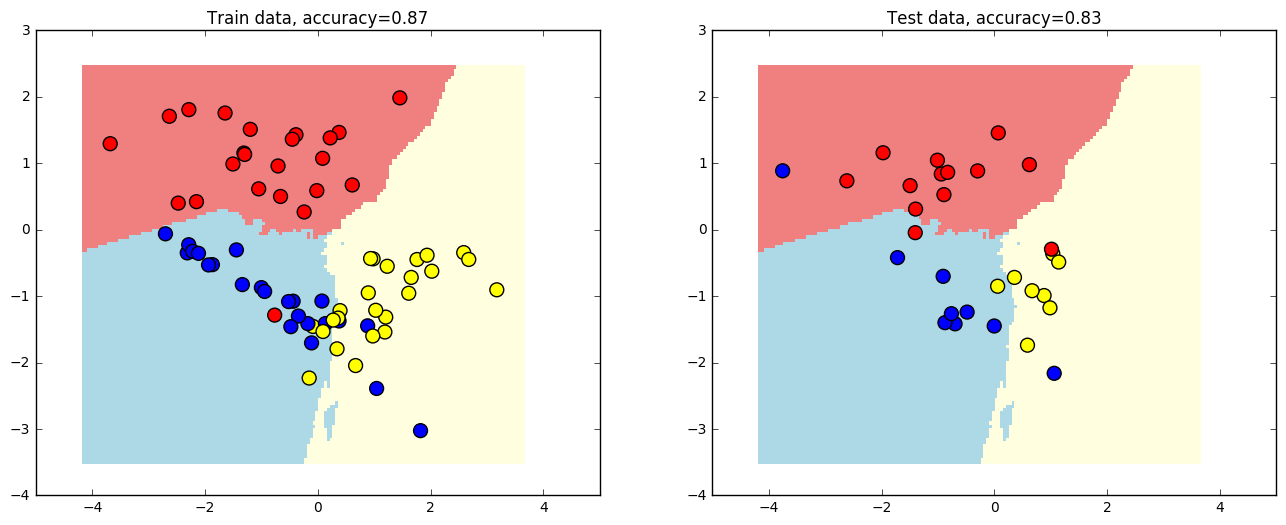

In [160]:
task_1(20,accuracy)

In [161]:
print(accuracy) 

[0.76714285714285713, 0.71714285714285708, 0.82428571428571418, 0.8242857142857144, 0.85285714285714287, 0.67000000000000004, 0.4871428571428571]


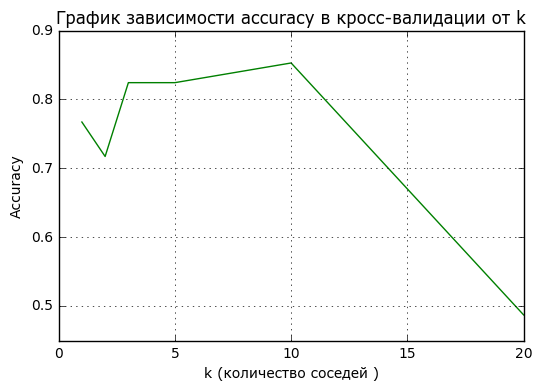

In [162]:
k=[1,2,3,5,10,15,20]
plt.grid()
plt.plot(k, accuracy, color = 'g')
plt.xlabel(u'k (количество соседей )',family='verdana' )
plt.ylabel('Accuracy')
plt.title(u'График зависимости accuracy в кросс-валидации от k', family='verdana')
plt.show()

### Из графика видим что, оптимальное количество соседей - 10



## Задача 2

In [44]:
from pandas import DataFrame
import scipy
import scipy.optimize as opt
import scipy.stats as sps
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB

In [8]:
digits = datasets.load_digits()
breast_cancer=datasets.load_breast_cancer()

In [32]:
accuracy_digits=[]
accuracy_cancer=[]

In [9]:
train_data_digits, test_data_digits, train_labels_digits, test_labels_digits = cross_validation.train_test_split(
                                                                                     digits.data, digits.target, 
                                                                                     test_size = 0.3)

In [12]:
train_data_cancer, test_data_cancer, train_labels_cancer, test_labels_cancer = cross_validation.train_test_split(
                                                                                     breast_cancer.data,
                                                                                     breast_cancer.target, 
                                                                                     test_size = 0.3)

In [10]:
train_data_digits[:3]

array([[  0.,   0.,   2.,  16.,   8.,   0.,   0.,   0.,   0.,   0.,   8.,
         15.,   5.,   0.,   0.,   0.,   0.,   2.,  16.,   7.,   0.,   0.,
          0.,   0.,   0.,   3.,  16.,   7.,   5.,   1.,   0.,   0.,   0.,
          7.,  16.,  16.,  16.,  15.,   3.,   0.,   0.,   5.,  16.,  12.,
          4.,  10.,  14.,   0.,   0.,   0.,  14.,  13.,   5.,  10.,  15.,
          0.,   0.,   0.,   3.,  13.,  16.,  16.,   7.,   0.],
       [  0.,   0.,   9.,  16.,  16.,  16.,   4.,   0.,   0.,   0.,   8.,
         16.,   5.,   4.,   0.,   0.,   0.,   1.,  15.,   9.,   0.,   0.,
          0.,   0.,   0.,   9.,  15.,   8.,   7.,   3.,   0.,   0.,   0.,
          3.,  12.,  12.,  14.,  16.,   5.,   0.,   0.,   0.,   0.,   0.,
          1.,  11.,  12.,   0.,   0.,   0.,   1.,   2.,   1.,  11.,  10.,
          0.,   0.,   0.,   9.,  16.,  16.,  16.,   4.,   0.],
       [  0.,   0.,   2.,  12.,  16.,  10.,   0.,   0.,   0.,   3.,  15.,
         10.,   7.,  16.,   4.,   0.,   0.,   9.,   8.,   0.

Признаки digits  - целые неотрицательные

In [11]:
train_labels_digits

array([6, 5, 8, ..., 3, 8, 4])

In [91]:
print ("target names: {names}".format(names = digits.target_names))

target names: [0 1 2 3 4 5 6 7 8 9]


In [13]:
train_data_cancer[:3]

array([[  1.49900000e+01,   2.52000000e+01,   9.55400000e+01,
          6.98800000e+02,   9.38700000e-02,   5.13100000e-02,
          2.39800000e-02,   2.89900000e-02,   1.56500000e-01,
          5.50400000e-02,   1.21400000e+00,   2.18800000e+00,
          8.07700000e+00,   1.06000000e+02,   6.88300000e-03,
          1.09400000e-02,   1.81800000e-02,   1.91700000e-02,
          7.88200000e-03,   1.75400000e-03,   1.49900000e+01,
          2.52000000e+01,   9.55400000e+01,   6.98800000e+02,
          9.38700000e-02,   5.13100000e-02,   2.39800000e-02,
          2.89900000e-02,   1.56500000e-01,   5.50400000e-02],
       [  1.10600000e+01,   1.49600000e+01,   7.14900000e+01,
          3.73900000e+02,   1.03300000e-01,   9.09700000e-02,
          5.39700000e-02,   3.34100000e-02,   1.77600000e-01,
          6.90700000e-02,   1.60100000e-01,   8.22500000e-01,
          1.35500000e+00,   1.08000000e+01,   7.41600000e-03,
          1.87700000e-02,   2.75800000e-02,   1.01000000e-02,
       

Признаки breas_cancer - вещественные

In [14]:
train_labels_cancer

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1,

In [96]:
print ("feature names: {}".format(breast_cancer.feature_names))
print ("target names: {names}".format(names = breast_cancer.target_names))

feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names: ['malignant' 'benign']


In [33]:
def task_2 (clf):
    scores = cross_validation.cross_val_score(clf.fit(train_data_digits,train_labels_digits),
                                              test_data_digits, test_labels_digits)
    accuracy_digits.append(scores.mean())
    scores = cross_validation.cross_val_score(clf.fit(train_data_cancer,train_labels_cancer), 
                                              test_data_cancer, test_labels_cancer)
    accuracy_cancer.append(scores.mean())

In [34]:
clf = BernoulliNB()
task_2(clf)

In [35]:
clf = MultinomialNB()
task_2(clf)

In [36]:
clf = GaussianNB()
task_2(clf)

In [37]:
print (accuracy_cancer)

[0.63157894736842102, 0.9122807017543858, 0.94736842105263153]


##### Максимальное качетсво  классификации на датасете breast_cancer - 0.947

In [38]:
print (accuracy_digits)

[0.83700513517129238, 0.89646403836456623, 0.84472744486637241]


##### Максимальное качетсво классификации на датасете digits - 0.896

### Верны следующие утверждения: c, d 

## Задача 3

In [121]:
# генерируем датасет
eps=sps.norm.rvs(scale=0.2, size=500)
x=scipy.random.standard_normal(500)
y=0.5*x+np.ones(500)+eps

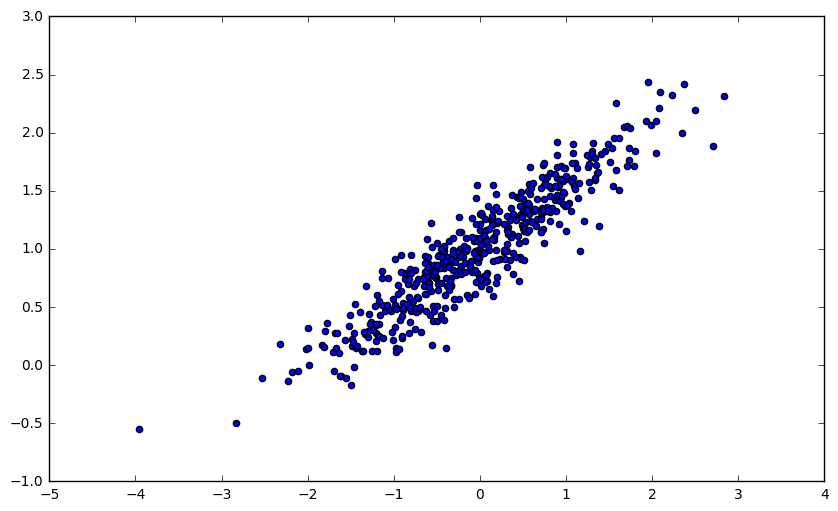

In [122]:
# визуализировали выборку
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.show()

In [123]:
def mse(arg):
    d=(y-arg[0]*x-arg[1]*np.ones(500))**2
    return d.mean()

In [124]:
optim_mse=opt.minimize(mse,[0.,0.])

In [125]:
print (optim_mse)

      fun: 0.03961751769574973
 hess_inv: array([[ 0.5506236 ,  0.00677008],
       [ 0.00677008,  0.5042011 ]])
      jac: array([ -1.58231705e-06,   1.20885670e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 0.50673867,  1.00650554])


In [126]:
#  Восстанавливаем по выборке зависимость y(x)
y_res=x*optim_mse.x[0]+optim_mse.x[1]*np.ones(500)

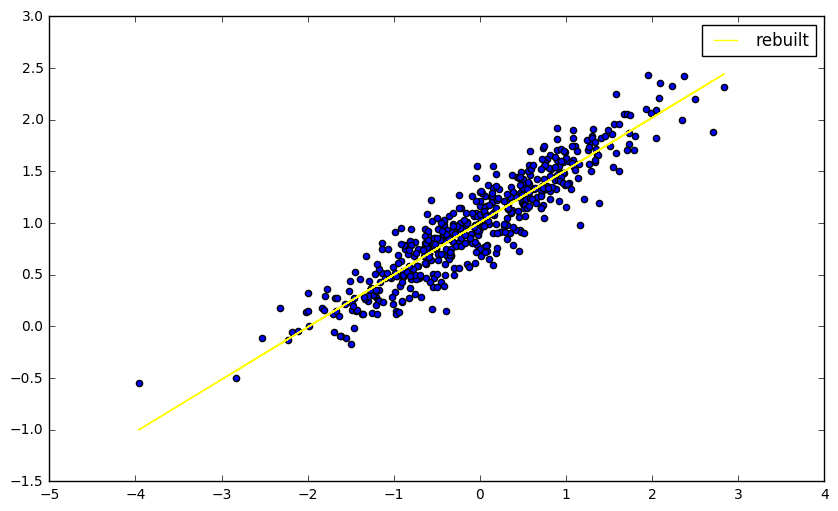

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.plot(x, y_res, color="yellow", label=u"rebuilt")
plt.legend()
plt.show()

In [128]:
x_add=scipy.random.standard_normal(75)
y_add=(-1)*np.ones(75)+eps[:75]
print(len(x_add), len(y_add))
print(len(x), len(y))

75 75
500 500


In [129]:
#добавляем новые точки
y_new=np.append(y, y_add)
x_new=np.append(x, x_add)


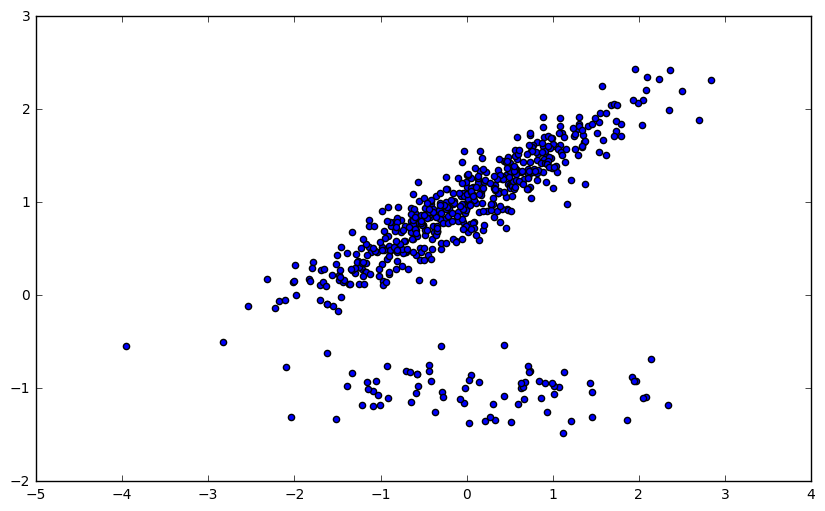

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(x_new,y_new)
plt.show()

In [133]:
def mae(arg):
    d=abs(y_new-arg[0]*x_new-arg[1]*np.ones(575))
    return d.mean()

In [135]:
def new_mse(arg):
    d=(y_new-arg[0]*x_new-arg[1]*np.ones(575))**2
    return d.mean()

In [136]:
optim_mse=opt.minimize(new_mse,[0.,0.])
optim_mae=opt.minimize(mae,[0.,0.])

In [142]:
y_mse=x_new*optim_mse.x[0]+optim_mse.x[1]*np.ones(575)
y_mae=x_new*optim_mae.x[0]+optim_mae.x[1]*np.ones(575)

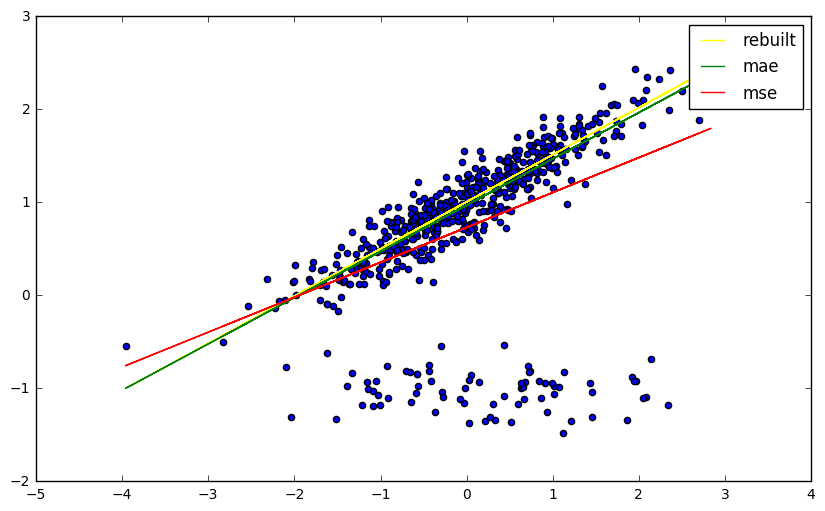

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(x_new,y_new)
plt.plot(x, y_res, color="yellow", label=u"rebuilt")
plt.plot(x_new, y_mae, color="green", label=u"mae")
plt.plot(x_new, y_mse, color="red", label=u"mse")
plt.legend()
plt.show()

###  На основе полученных графиков можно сдеать вывод, что модель, оптимизирующая MAE, более устойчива к выбросам, чем модель, оптимизирующая MSE.
